# Lista 8 (10 pkt.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Zadanie 1 (2 pkt.)

Napisz funkcję $gen(a,b,p)$, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [2]:
from math import sqrt

def gen(a,b,p):
   
    def y_pow2(x):
        return (x**3 + a*x + b) % p

    points = []

    for x in range(p):
        root = sqrt(y_pow2(x))

        # square root is an integer
        if root.is_integer():
            y1 = int(root % p)
            y2 = int((-root) % p)
            if y1 == y2:
                points.append([x, y1])
            else:
                points.extend([[x, y1], [x, y2]])
                
        # square root is not an integer
        else:
            Y = y_pow2(x)
            for y in range(p-1):
                if y**2 % p == Y:
                    points.extend([[x, y], [x, p-y]])
                    break

    return points
    

In [3]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję $add(P,Q,a,p)$, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję $inv$ z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako $nan$, tj. za pomocą $float('nan')$, do sprawdzania czy coś jest $nan$ użyj $np.isnan()$.

In [4]:
def add(P,Q,a,p):
    def inv_mod_p(n): 
        return pow(n, p-2, p)

    def is_infty(point):
        return np.isnan(point[0]) and np.isnan(point[1])
    
    def inv_point(P):
        if is_infty(P):
            return P
        return [P[0], (-P[1])%p]
    
    if is_infty(P):
        return Q
    
    if is_infty(Q):
        return P
                
    if Q == inv_point(P):
        return [float('nan'), float('nan')]
    
    x1, y1 = P
    x2, y2 = Q
    
    if P == Q:
        s = (3 * x1**2 + a) * inv_mod_p(2*y1)
    else:
        s = (y2 - y1) * inv_mod_p(x2 - x1)
    
    x3 = (s**2 - x1 - x2) % p
    y3 = (s * (x1 - x3) - y1) % p
    
    return [x3, y3]

In [5]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


W oparciu o poprzednią funkcję napisz funkcję $multiply(n,P,a,p)$, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [6]:
def multiply(n,P,a,p):
    
    P0 = P
    for _ in range(1, n):
        P = add(P, P0, a, p)
        
    return P

In [7]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty ($plt.scatter()$) reprezentujące krzywą eliptyczną. Stosując funkjcę $multiply()$ przeanalizuj jaką grupę generuje kazdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3-5x$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="fig.png" width="500"/>

Punkt $P_0$ generuje dwuelementową grupę:

{$P_0,\mathcal{O}$},

bo $2P_0=\mathcal{O}$,

punkt $P_1$ generuje pięcioelementową grupę:

{$P_1,P_3,P_4,P_2,\mathcal{O}$}

bo $2P_1=P_3,3P_1=P_4,4P_1=P_2,5P_1=\mathcal{O}$

pozostałe elementy $P_2,P_3,P_4$ generują dokładnie tą samą grupę, zatem na tej krzywej mamy określone dwie grupy jedną dwuelementową i jedną pięcioelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3-2x+1$

### 1. $\mathbb{Z}_7$, $y^2 = x^3 - x$

$a = -1, b=0, p=7$

Punkty:

In [8]:
def scatter(points, p):
    ax = plt.figure().gca()
    ax.yaxis.get_major_locator().set_params(integer=True)
    ax.xaxis.get_major_locator().set_params(integer=True)
    plt.xlim([-.25, p-.75])
    plt.ylim([-.25, p-.75])
    for i in range(len(points)):
        x, y = points[i]
        plt.scatter(x, y, facecolors='none', edgecolors='b')
        plt.text(x + .05, y + .05, f"P{i}")

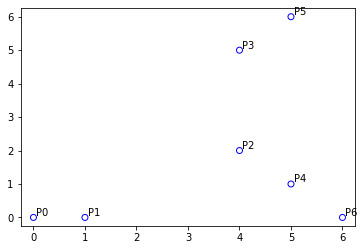

In [9]:
points = gen(-1, 0, 7)
scatter(points, 7)

In [10]:
def multiply1(n, P):
    return multiply(n, P, -1, 7)

In [11]:
multiply1(1, points[0]), multiply1(2, points[0])

([0, 0], [nan, nan])

Punkt $P_0$ daje dwuelementową grupę {$P_0,\mathcal{O}$}

In [12]:
multiply1(1, points[1]), multiply1(2, points[1])

([1, 0], [nan, nan])

Punkt $P_1$ daje dwuelementową grupę {$P_1,\mathcal{O}$}

In [13]:
multiply1(1, points[2]), multiply1(2, points[2]), multiply1(3, points[2]), multiply1(4, points[2])

([4, 2], [1, 0], [4, 5], [nan, nan])

Punkt $P_2$ daje czteroelementową grupę {$P_2, P_1, P_3, \mathcal{O}$}

In [14]:
multiply1(1, points[3]), multiply1(2, points[3]), multiply1(3, points[3]), multiply1(4, points[3])

([4, 5], [1, 0], [4, 2], [nan, nan])

Punkt $P_3$ daje czteroelementową grupę {$P_3, P_1, P_2, \mathcal{O}$}

In [15]:
multiply1(1, points[4]), multiply1(2, points[4]), multiply1(3, points[4]), multiply1(4, points[4])

([5, 1], [1, 0], [5, 6], [nan, nan])

Punkt $P_4$ daje czteroelementową grupę {$P_4, P_1, P_5, \mathcal{O}$}

In [16]:
multiply1(1, points[5]), multiply1(2, points[5]), multiply1(3, points[5]), multiply1(4, points[5])

([5, 6], [1, 0], [5, 1], [nan, nan])

Punkt $P_5$ daje czteroelementową grupę {$P_5, , P_1, P_4, \mathcal{O}$}

In [17]:
multiply1(1, points[6]), multiply1(2, points[6])

([6, 0], [nan, nan])

Punkt $P_6$ daje dwuelementową grupę {$P_6,\mathcal{O}$}

### 2. $\mathbb{Z}_7$, $y^2 = x^3 -2x + 1$

$a = -2, b=1, p=5$

Punkty:

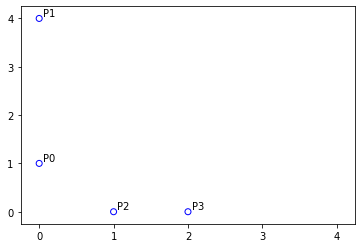

In [18]:
points = gen(-2, 1, 5)
scatter(points, 5)

Warunek nieosobliwości: $4a^3 + 27b^2  \not\equiv 0 \mod p$

In [19]:
def warunek_nieosobliwosci(a, b, p):
    return (4*a**3 + 27*b**2) % p != 0

warunek_nieosobliwosci(-2, 1, 5)

False

jest niespełniony

## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji $gen()$, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

In [20]:
from sympy import primerange
# list(primerange(0,1000))

lub jakkolwiek inaczej.

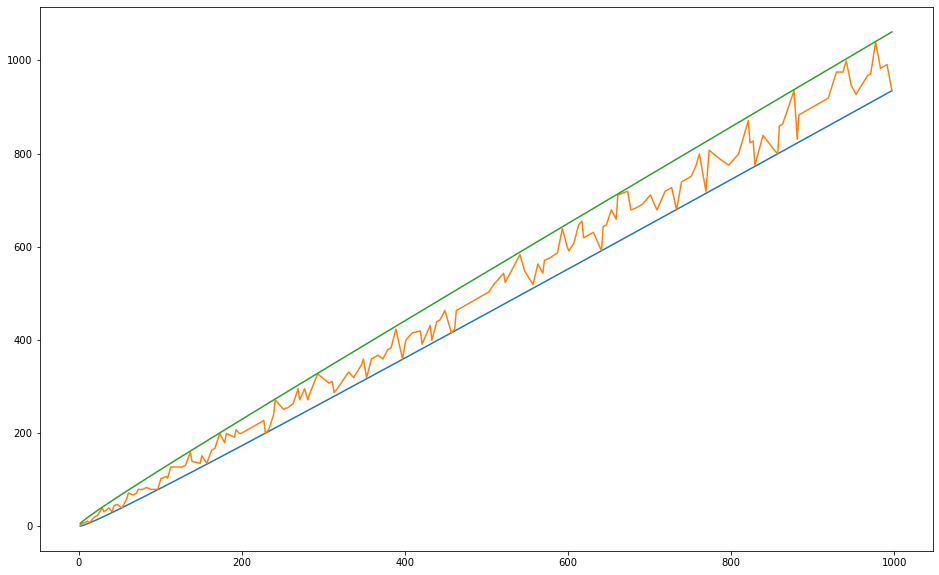

In [21]:
a = -1
b = 0

def no_of_points(p):
    return len(gen(a,b,p))

ps = list(primerange(0,1000))

plt.figure(figsize=(16,10))
plt.plot(ps, list(map(lambda p: p + 1 - 2*sqrt(p), ps)))
plt.plot(ps, list(map(lambda p: no_of_points(p), ps)))
plt.plot(ps, list(map(lambda p: p + 1 + 2*sqrt(p), ps)))

## Zadanie 5 (2 pkt.)

Napisz funkcję $ord(G,a,p)$ znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [22]:
def ord(G,a,p):
    n = 1
    m = multiply(n, G, a, p)
    while not (np.isnan(m[0]) and np.isnan(m[1])):
        n += 1
        m = multiply(n, G, a, p)
            
    return n

In [23]:
print(ord([4,4],-1,11)==3)
print(ord([8,8],-1,11)==6)
print(ord([3,2],-1,7)==3)
print(ord([3,5],-1,7)==3)
print(ord([3,2],0,5)==3)
print(ord([0,0],0,5)==2)

True
True
True
True
True
True


In [24]:
from math import inf

a = -1
b = 0
p = 97

points = gen(a, b, p)
print(f"Liczba punktów: {len(points)}")
orders = map(lambda point: (point, ord(point, a, p)), points)
sorted(orders, key=lambda o: o[1], reverse=True)[0]


Liczba punktów: 79


([6, 4], 20)

## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$,$b$,$p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [32]:
from random import randint

In [33]:
a = -1
b = 0
G = [6,4]
p = 97

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [34]:
n=randint(2,20)
n

14

Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [39]:
A=multiply(n,G,a,p)
A

[65, 27]

To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [40]:
m=randint(2,20)
B=multiply(m,G,a,p)
m,B

(6, [65, 70])

Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [41]:
k_B=multiply(m,A,a,p)
k_A=multiply(n,B,a,p)

In [42]:
k_A==k_B

True

Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.